In [1]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from utils import *
plt.style.use('seaborn-muted')
import sympy

# Elasticity

Suppose you own a business but you find yourself struggling to make a profit lately. How would you resolve this? You might consider raising your prices. But surely if you were to raise your prices too much you might lose some of your customers. To relate to our discussions above regarding surplus, maybe some of your customers are already at their highest willingness to pay, and raising prices would push them away from your business. Depending on the situation, you might lose so many customers that the increased revenue from raising your prices are completely offset by a decline in customers. This is a problem. To answer the question of how much to raise prices without losing too many customers and therefore losing revenue, we would like a way to measure this concept of customers' responsiveness to prices. We call this concept *elasticity*.

```{admonition} Definition
**Elasticity** is a measure of how much the quantity of something changes in response to a price change. Typically, it is a measure of the percent change in the quantity demanded of a good in response to a percent change in its price.
```

How would we measure elasticity? In the above context, we want to see how much quantity demanded of your business's goods or services changes in response to a change in price. It seems like a good place to start would be to define elasticity as the percent change in quantity over percent change in price. Let's use the demand curve depicted below as an example.

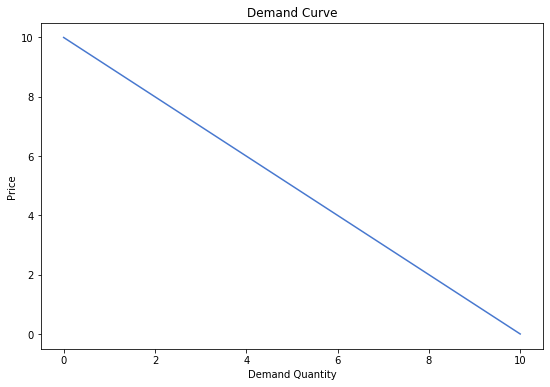

In [2]:
def plot_demand1():
    p = sympy.Symbol("p")
    demand_equation = 10 - p
    prices = [x for x in range(0,11)]
    demand_Q = [demand_equation.subs(p,x) for x in prices]
    plt.figure(figsize = [9,6])
    plt.plot(prices,demand_Q)
    plt.xlabel("Demand Quantity")
    plt.ylabel("Price")
    plt.title("Demand Curve")

plot_demand1()
plt.show()

Now let's say our current price is 5, and we would like to increase the price to 6. We can see from the curve that this causes demand to drop from 5 to 4.

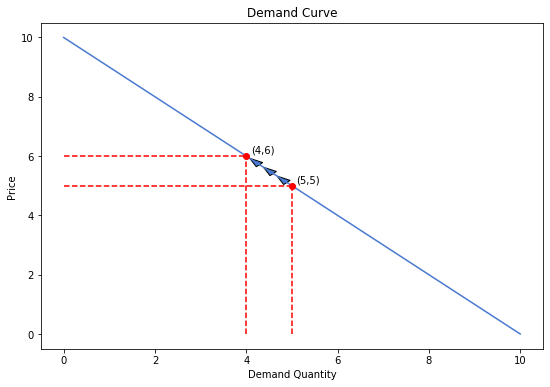

In [3]:
plot_demand1()
plt.plot(np.full(6,5), np.arange(0,6,1), 'r--')
plt.plot(np.full(7,4), np.arange(0,7,1), 'r--')
plt.plot(np.arange(0,6,1), np.full(6,5), 'r--')
plt.plot(np.arange(0,5,1), np.full(5,6), 'r--')
plt.plot(5,5,'ro')
plt.text(5.1,5.1,"(5,5)")
plt.plot(4,6,'ro')
plt.text(4.1,6.1,"(4,6)")
plt.arrow(4.9,5.1,-0.01,0.01,head_width=0.2)
plt.arrow(4.6,5.4,-0.01,0.01,head_width=0.2)
plt.arrow(4.3,5.7,-0.01,0.01,head_width=0.2)
plt.show()

Using our definition from above, we can calculate the elasticity.

$$
\begin{align}
\frac{\%\Delta Q}{\%\Delta P} &= \frac{\frac{4-5}{5}\times100\%}{\frac{6-5}{5}\times100\%} \\
&= \frac{-20\%}{20\%} \\
&= 1
\end{align}
$$

*Note that we take the absolute value for elasticity.*

This tells us that in this specific example, the percent change in price is met with an equal percent change in quantity. But what happens if we start at a price of 6 and go down to a price of 5? This movement is just the opposite of what we did above, so is the elasticity also 1? Let's see.

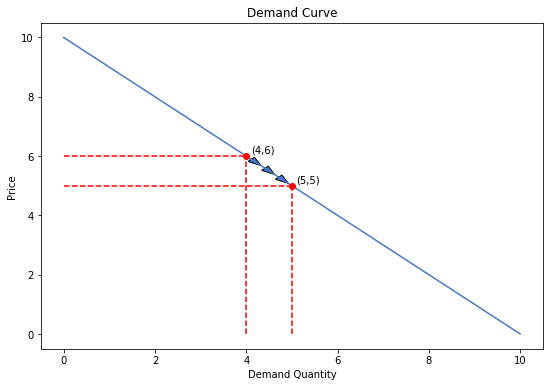

In [4]:
plot_demand1()
plt.plot(np.full(6,5), np.arange(0,6,1), 'r--')
plt.plot(np.full(7,4), np.arange(0,7,1), 'r--')
plt.plot(np.arange(0,6,1), np.full(6,5), 'r--')
plt.plot(np.arange(0,5,1), np.full(5,6), 'r--')
plt.plot(5,5,'ro')
plt.text(5.1,5.1,"(5,5)")
plt.plot(4,6,'ro')
plt.text(4.1,6.1,"(4,6)")
plt.arrow(4.7,5.3,0.01,-0.01,head_width=0.2)
plt.arrow(4.4,5.6,0.01,-0.01,head_width=0.2)
plt.arrow(4.1,5.9,0.01,-0.01,head_width=0.2)
plt.show()

$$
\begin{align}
\frac{\%\Delta Q}{\%\Delta P} &= \frac{\frac{5-4}{4}\times100\%}{\frac{5-6}{6}\times100\%} \\
&= \frac{25\%}{-16.67\%} \\
&\approx 1.5
\end{align}
$$

We get a different number! This is of course a property of percentages. In both scenarios we moved price by 1, but we started at different prices, and increasing price by 1 starting from 5 is different percentage-wise from starting at 6 and decreasing by 1.

If we want to find a unique value for elasticity between the price points of 5 and 6, independent of price movement, we can use something called the **mid-point method**. It looks like this:

$$\frac{\frac{Q_2 - Q_1}{(Q_2 + Q_1)\times0.5}\times100\%}{\frac{P_2 - P_1}{(P_2 + P_1)\times0.5}\times100\%}$$

What this does is it essentially finds the elasticity of the point between the two given points.

It is also useful, however, to think of elasticity as a property of a single point. For example, we might want the price point of 5 in the example above to have an elasticity of 1 irrespective of what other point we are going to or coming from. For this, we can use the **point-slope formula**.

$$\frac{\Delta Q}{\Delta P}\frac{P}{Q}$$

or

$$\frac{dQ}{dP}\Bigr|_{P,Q}\times\frac{P}{Q}$$

where the left fraction is the inverse slope at that particular point.

It turns out that in our example above, we can think of the very first formula for elasticity (percent change in quantity over percent change in price) as the point-slope elasticity of the starting point. To verify this, find the elasticity from a price of 5 to 6, from a price of 5 to 4, and at the price of 5 using the point-slope formula. You should get the same answer all three times. This does not hold in general for all curves, but using the base formula that was first introduced should be fine for our examples and other situations.

## Other Elasticities

We can measure elasticity in different contexts as well. Naturally, if we have an elasticity of demand, it follows that we should have an elasticity of supply. Just like consumers make adjustments to their quantity demanded based on changes in the market price, producers respond to market prices as well. Elasticity of supply can be calculated similarly to elasticity of demand.

Imagine that there are two fast food locations next to each other on campus competing for students' business. Let's call them Railway and Bear Express. Initially, their food is priced such that they get equal amounts of business from the students, and students on average don't prefer one over the other; they just want a good and affordable place to eat. Now, imagine that Bear Express raises the prices of their food, while Railway holds their prices steady. In this scenario, one can imagine that students would begin eating more frequently at Railway as opposed to Bear Express due to it being relatively cheaper out of the two options. Now, if Railway in turn increases their prices, the flow of students would shift back to Bear Express by a certain amount. These two restaurants are said to offer goods that are *substitutes* to each other. That is, a consumer will want one or the other, but usually not both. Furthermore, it would seem that just like the price of a good affects its quantity demanded, for substitutes the price of one good can affect the quantity demanded of the other. This is called *cross-price elasticity of demand* (as opposed to *own-price elasticity* that we just learned earlier). It can be defined as follows:

$$\frac{\%\Delta Q_{Good A}}{\%\Delta P_{Good B}}$$

Notice that here there is a notion of positive and negative elasticity. Substitutes will have positive cross-price elasticity, because we expect that an increase in the price of one good will lead to an increase in the quantity demanded of its substitute. But what about when cross-price elasticity is negative? In other words, are there goods where an increase in the price of one leads to a decrease in the quantity demanded of the other? Of course; these are called *complements*. Examples of complementary goods could be cars and gasoline, hot dogs and hot dog buns, or peanut butter and jelly.

There is one more type of elasticity that we will briefly discuss, and that is *income elasticity of demand*. For most goods, the more disposable income consumers have the more they will demand these goods. Almost all goods follow this pattern, and thus there are countless examples. These goods are called *normal goods*. More interestingly, there are some goods, called *inferior goods*, for which we see quantity demanded decrease as income increases. An example of this might be frozen, microwaveable food. As consumers grow wealthier and their palates grow more discerning, their consumption of frozen food might decrease in place of more cooked meals. To calculate this elasticity we would use the following:

$$\frac{\%\Delta Q}{\%\Delta Income}$$

## Elasticity and Revenue

Let's take a closer look at own-price elasticity of demand. Below we've defined a function using our first definition. Let's see what happens as we increase price. Note that is this percent change in quantity over % change in price. While this is a negative quantity usually, we still denote it as a positive number.

In [5]:
def elasticity(P1,P2,Q1,Q2):
    return ((Q2-Q1)/Q1)/((P2-P1)/P1)

p = sympy.Symbol("p")
demand_equation = 10-p
prices = [i for i in range(1,10)]

print("Price: Elasticity")
print()

for x in prices:
    print(str(x)+":", abs(elasticity(x,x+1,demand_equation.subs(p,x),demand_equation.subs(p,x+1))))

Price: Elasticity

1: 0.111111111111111
2: 0.250000000000000
3: 0.428571428571429
4: 0.666666666666667
5: 1.00000000000000
6: 1.50000000000000
7: 2.33333333333333
8: 4.00000000000000
9: 9.00000000000000


Notice how a price increase will increase revenue until a certain point, at which point revenue decreases again. Intuitively this makes sense. A firm can only increase its prices so much until it starts losing too many of its customers for the increase to be worthwhile. Let's try and find when this happens in general. First let's plot revenue as a function of price.

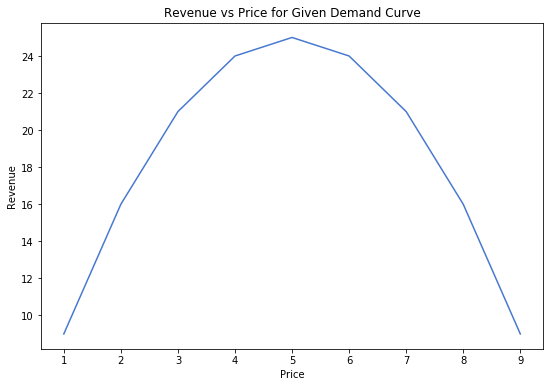

In [6]:
elast = [abs(elasticity(x,x+1,demand_equation.subs(p,x),demand_equation.subs(p,x+1))) for x in range(1,10)]
revenue = [demand_equation.subs(p,x)*x for x in range(1,10)]
prices = [x for x in range(1,10)]
plt.figure(figsize = [9,6])
plt.plot(prices,revenue)
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.title("Revenue vs Price for Given Demand Curve")
plt.show()

We notice that revenue reaches a maximun at a price of 5. What elasticity does this price point have?

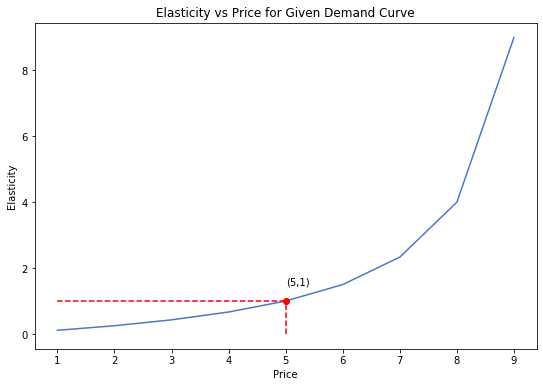

In [7]:
plt.figure(figsize = [9,6])
plt.plot(prices,elast)
plt.plot(np.arange(1,6,1), np.full(5,1), 'r--')
plt.plot(np.full(2,5), np.arange(0,2,1), 'r--')
plt.plot(5,1,'ro')
plt.text(5,1.5,"(5,1)")
plt.xlabel("Price")
plt.ylabel("Elasticity")
plt.title("Elasticity vs Price for Given Demand Curve")
plt.show()

Revenue is maximized when elasticity is 1! To further reinforce this, let's plot revenue vs elasticity.

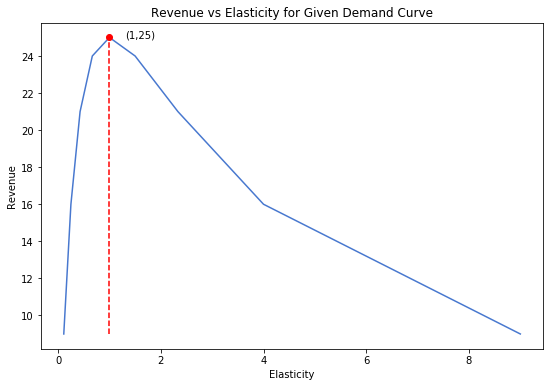

In [8]:
plt.figure(figsize = [9,6])
plt.plot(elast,revenue)
plt.plot(np.full(17,1), np.arange(9,26,1), 'r--')
plt.plot(1,25,'ro')
plt.text(1.3,25,"(1,25)")
plt.xlabel("Elasticity")
plt.ylabel("Revenue")
plt.title("Revenue vs Elasticity for Given Demand Curve")
plt.show()

Before we continue to the final section let's make sure we have a solid intuitive grasp of the significance of our findings. Near low price points, a firm deciding how to raise prices will tend to face inelastic demand. You can imagine that if there were some market where let's say laptops cost only a few dollars, doubling the price of laptops would probably not decrease demand for laptops at all, since the price of laptops is still very low. Here, demand is inelastic, or in other words, it is less than 1, because a unit change in price is not met by the same change in quantity. Alternatively, if laptops were to cost as much as a house, and then the price for laptops doubled, the few people who were still in the market for laptops would probably be very discouraged from continuing to buy laptops. It wouldn't be unreasonable to assume that nearly all of the demand would be lost. Here, demand is elastic, or greater than 1, because a unit change in price is met by an even greater change in quantity. The point of the above exercise is to illustrate that there is some middle ground between these two extremes, where a firm with a good pulse on market demand should be pricing its products.

It's important to remember that while we have so far been discussing elasticity from a demand perspective, supply also has the property of elasticity.

## Relative Elasticity

Suppose that you are hiking in the mountains when a venomous snake bites you. Fortunately there is a hospital nearby. Unfortunately, it seems that their antivenom is very expensive. If the antivenom costs \$1000, would you pay? What if the price doubled to \$2000? What is your max willingness to pay for this antivenom? In the moment, you would likely be willing to pay anything and everything for the antivenom, as any money you refuse to pay won't be of much use to you if you're dead.

Contrast this with your demand for pizza. Imagine a pizza chain close to where you live doubles their prices from \$3 a slice to \$6 a slice. Most people would be disuaded from buying pizza by this price increase, assuming that there are many alternatives to pizza close to where you live. Since pizza is not a very essential good, and there are plenty of other places to eat close to where you live, most wouldn't see the point in getting pizza anymore.

We can easily see that any change in price is unlikely to change the demand for antivenom in our example, and thus we say the demand for antivenom is inelastic. But this is a different kind of elasticity. We are not measuring the marginal change in quantity demanded at a given price point or interval, we are saying that in general, on the demand curve for antivenom the elasticity at any price is more inelastic than some other typical demand curve. Similarly, in our example we can say that the demand for pizza is relatively elastic, as the pizza chain cannot change their prices too much without significantly altering the quantity demanded for their pizza. The keyword in this concept is *relative*. It doesn't really make much sense to say that the demand for antivenom is inelastic without there being at least one other kind of demand that is comparatively elastic.


More specifically, our example of antivenom likely exhibits *perfect inelasticity*, meaning that demand for antivenom is the same at absolutely any price; the hospital can charge any price it wants for antivenom. Contrast this with our nearby pizza chain. If we make some further assumptions and say that the market for food around your house or apartment is perfectly competitive, such that any marginal increase in price of one food chain will cause them to lose all of their customers to other food chains, then the demand for the specific food of that chain is *perfectly elastic*. The chain cannot increase its prices or else it will lose all demand. These two extreme scenarios are depicted below.

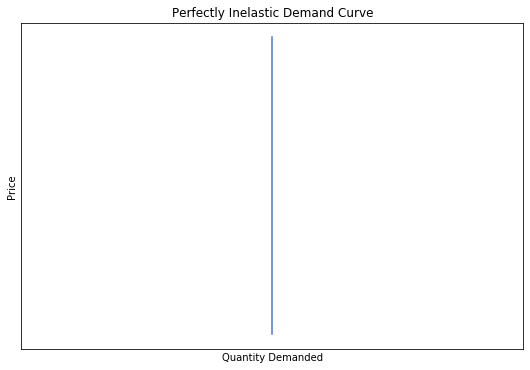

In [9]:
plt.figure(figsize = [9,6])
plt.plot(np.full(20,1), np.arange(0,20,1))
plt.xlabel("Quantity Demanded")
plt.ylabel("Price")
plt.title("Perfectly Inelastic Demand Curve")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

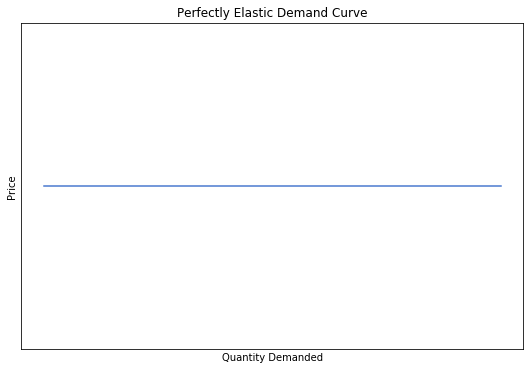

In [10]:
plt.figure(figsize = [9,6])
plt.plot(np.arange(0,20,1), np.full(20,1))
plt.xlabel("Quantity Demanded")
plt.ylabel("Price")
plt.title("Perfectly Elastic Demand Curve")
plt.xticks([], [])
plt.yticks([], [])
plt.show()